<a href="https://colab.research.google.com/github/Rimsha-Naaz12/PROJECT/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
d= pd.read_csv('/content/Predict Student Dropout and Academic Success.csv')
#print(d)
d=d.dropna()
print(d)

      Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                                1             

In [ ]:
y=d['Target']
y=y.dropna()
print(y)

0        Dropout
1       Graduate
2        Dropout
3       Graduate
4       Graduate
          ...   
4419    Graduate
4420     Dropout
4421     Dropout
4422    Graduate
4423    Graduate
Name: Target, Length: 4424, dtype: object


In [ ]:
x=d.drop('Target',axis=1)
x=x.dropna()
print(x)

      Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                                1             

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(d, test_size = 20) # This line defines the train variable.

# Use integer indexing for iloc
x_train = train.iloc[:, :20] # Select the first 20 columns
x_train=x_train.dropna()
x_test = test.iloc[:, :20]
x_test=x_test.dropna()
y_train = train['Target']
y_train=y_train.dropna()
y_test = test['Target']
y_test=y_test.dropna()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

imputer = SimpleImputer(strategy='mean')

x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform y_train
y_train = label_encoder.fit_transform(y_train.ravel())

print(x_train.shape)
print(y_train.shape)

min_samples = min(x_train.shape[0], y_train.shape[0])
x_train = x_train[:min_samples]
y_train = y_train[:min_samples]

model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

(4404, 20)
(4404,)


<ipython-input-5-9dd1a4ecaedf>:15: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = label_encoder.fit_transform(y_train.ravel())


LinearRegression()

In [ ]:
from sklearn.svm import SVR
model_svr = SVR()
model_svr.fit(x_train, y_train)

SVR()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)



print(x_train.shape)
print(y_train.shape)


min_samples = min(x_train.shape[0], y_train.shape[0])
x_train = x_train[:min_samples]
y_train = y_train[:min_samples]

model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

from sklearn.svm import SVR
model_svr = SVR()


model_svr.fit(x_train, y_train)

y_pred_train = model_svr.predict(x_train)

min_samples_test = min(x_test.shape[0], y_test.shape[0])
x_test = x_test[:min_samples_test]
y_test = y_test[:min_samples_test]

# Apply LabelEncoder to y_test
y_test = label_encoder.transform(y_test) # Use the label_encoder fitted on y_train

y_pred_test= model_svr.predict(x_test)

print(f'train data MSE score SVR: {mean_squared_error(y_train,y_pred_train )}')
print(f'train data MAE score SVR: {mean_absolute_error(y_train, y_pred_train)}')
print(f'train data RMSE score SVR: {root_mean_squared_error(y_train,y_pred_train )}')



print()
print(f'test data MSE score SVR: {mean_squared_error(y_test, y_pred_test)}')
print(f'test data MAE score SVR: {mean_absolute_error(y_test, y_pred_test)}')
print(f'test data RMSE score SVR: {root_mean_squared_error(y_test, y_pred_test)}')
print()

(4404, 20)
(4404,)
train data MSE score SVR: 1.2206025757387442
train data MAE score SVR: 0.8122337481974687
train data RMSE score SVR: 1.1048088412656483

test data MSE score SVR: 1.588774322854664
test data MAE score SVR: 1.010354037405429
test data RMSE score SVR: 1.2604659149912243



In [ ]:
from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso(alpha=1.0)
model_lasso.fit(x_train, y_train)

Lasso()

In [ ]:
from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso(alpha=1.0)
model_lasso.fit(x_train, y_train)

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(x_train, y_train)


y_pred_lasso = model_lasso.predict(x_test)
y_pred_ridge = model_ridge.predict(x_test)

y_pred_lasso1 = model_lasso.predict(x_train)
y_pred_ridge1 = model_ridge.predict(x_train)

print(f'test data MSE score lasso: {mean_squared_error(y_test,y_pred_lasso)}')
print(f'test data MAE score lasso: {mean_absolute_error(y_test, y_pred_lasso)}')
print(f'test data RMSE score lasso: {root_mean_squared_error(y_test, y_pred_lasso)}')
print()
print(f'train data MSE score lasso: {mean_squared_error(y_train,y_pred_lasso1)}')
print(f'train data MAE score lasso: {mean_absolute_error(y_train,y_pred_lasso1 )}')
print(f'train data RMSE score lasso: {root_mean_squared_error(y_train,y_pred_lasso1)}')

test data MSE score lasso: 0.8637340449174173
test data MAE score lasso: 0.8596581863496257
test data RMSE score lasso: 0.9293729310225348

train data MSE score lasso: 0.7398831731890916
train data MAE score lasso: 0.7859002854527831
train data RMSE score lasso: 0.8601646198194225


In [ ]:
from sklearn.linear_model import Lasso, Ridge
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(x_train, y_train)

Ridge()

In [ ]:
print(f'train data MSE score ridge: {mean_squared_error(y_train,y_pred_ridge1)}')
print(f'train data MAE score ridge: {mean_absolute_error(y_train,y_pred_ridge1 )}')
print(f'train data RMSE score ridge: {root_mean_squared_error(y_train,y_pred_ridge1)}')
print()
print(f'test data MSE score ridge: {mean_squared_error(y_test,y_pred_ridge)}')
print(f'test data MAE score ridge: {mean_absolute_error(y_test,y_pred_ridge )}')
print(f'test data RMSE score ridge: {root_mean_squared_error(y_test,y_pred_ridge)}')
print()

train data MSE score ridge: 0.5626986854398189
train data MAE score ridge: 0.627588482587109
train data RMSE score ridge: 0.7501324452653804

test data MSE score ridge: 0.672111801030093
test data MAE score ridge: 0.6971722104185398
test data RMSE score ridge: 0.8198242500866225



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Generate predictions on the test data
y_pred = model_lr.predict(x_test)

# Calculate Mean Square Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Square Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Print the results
print(f"Mean Square Error (MSE): {mse}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


Mean Square Error (MSE): 0.6721488135350429
Root Mean Square Error (RMSE): 0.8198468232145825
Mean Absolute Error (MAE): 0.6971718715953863


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


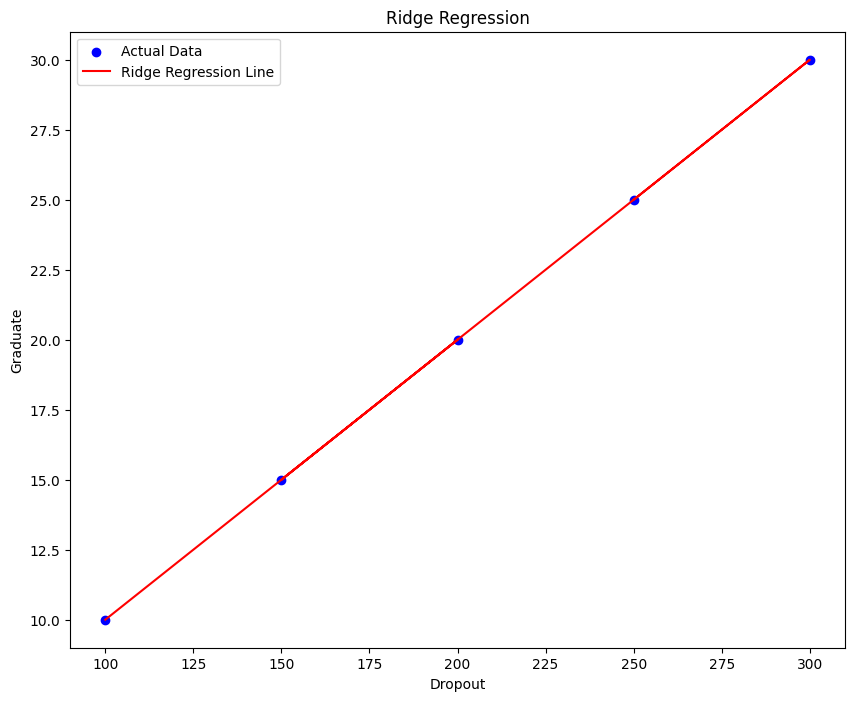

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
import pandas as pd
# Sample data
data = pd.DataFrame({'Dropout': [100, 200, 150, 300, 250], 'Graduate': [10, 20, 15,30, 25]})
# Defining X (independent variable) and y (dependent variable)
X_ridge = data[['Dropout']].to_numpy()
y_ridge = data['Graduate'].to_numpy()
# Ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_ridge, y_ridge)
# Predicting deaths based on cases
y_pred = ridge.predict(X_ridge)
# Plotting the results
plt.figure(figsize=(10, 8))
# Scatter plot of actual data points
plt.scatter(X_ridge, y_ridge, color='blue', label='Actual Data')
# Plotting the regression line
plt.plot(X_ridge, y_pred, color='red', label='Ridge Regression Line')
plt.xlabel('Dropout')
plt.ylabel('Graduate')
plt.title('Ridge Regression')
plt.legend()

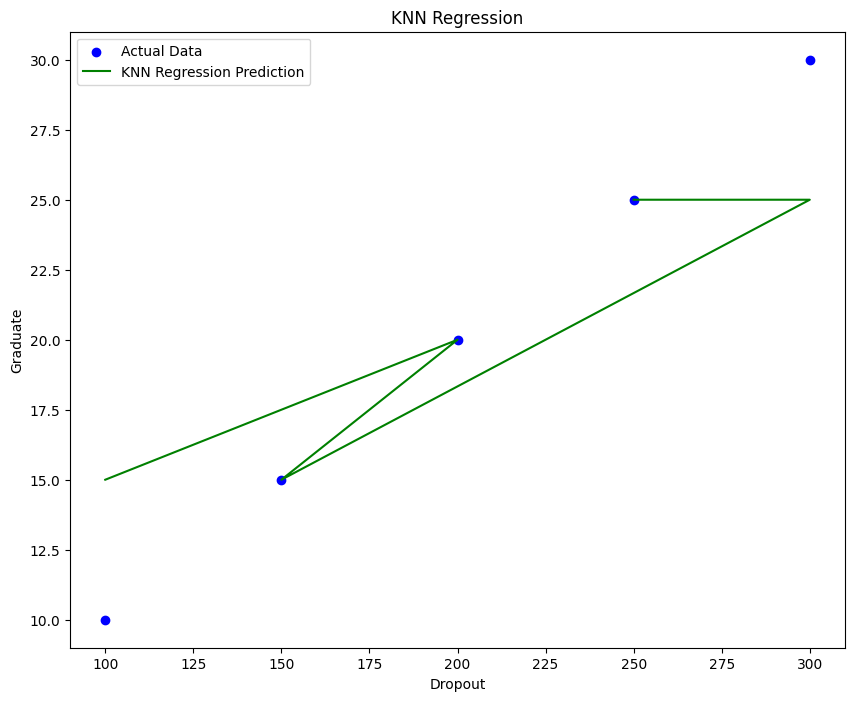

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
data = pd.DataFrame({'Dropout': [100, 200, 150, 300, 250], 'Graduate': [10, 20, 15,30, 25]})
X_knn = data[['Dropout']].to_numpy()
y_knn = data['Graduate'].to_numpy()
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_knn, y_knn)
y_pred_knn = knn.predict(X_knn)
plt.figure(figsize=(10, 8))
plt.scatter(X_knn, y_knn, color='blue', label='Actual Data')
plt.plot(X_knn, y_pred_knn, color='green', label='KNN Regression Prediction')
plt.xlabel('Dropout')
plt.ylabel('Graduate')
plt.title('KNN Regression')
plt.legend()
plt.show()

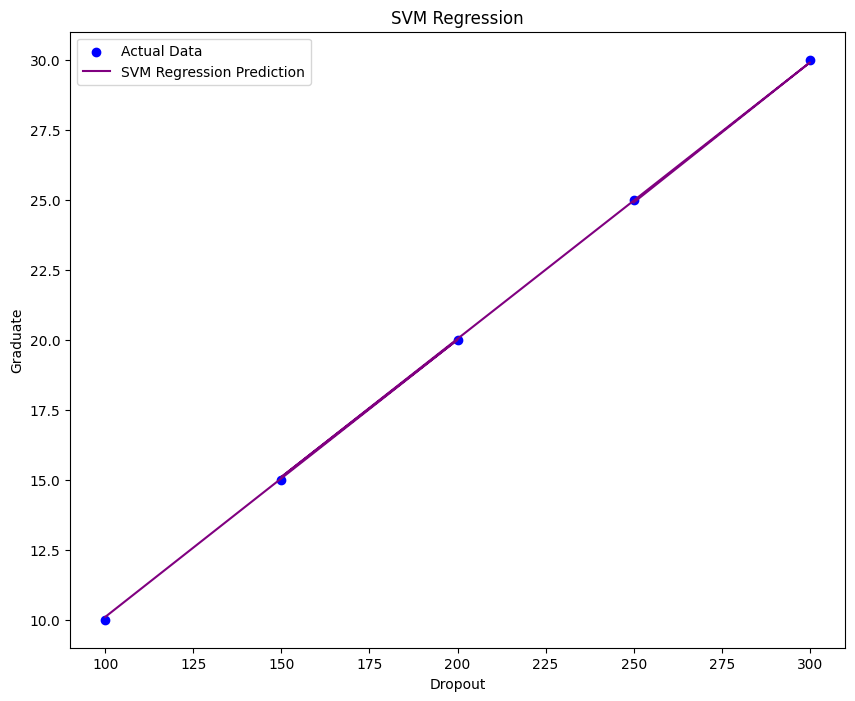

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
import pandas as pd
# Sample data
data = pd.DataFrame({'Dropout': [100, 200, 150, 300, 250], 'Graduate': [10, 20, 15,30, 25]})
# Defining X (independent variable) and y (dependent variable)
X_svm = data[['Dropout']].to_numpy()
y_svm = data['Graduate'].to_numpy()
# SVM regression model with an RBF kernel
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_svm, y_svm)
# Predicting deaths based on cases
y_pred_svm = svr.predict(X_svm)
# Plotting the results
plt.figure(figsize=(10, 8))
# Scatter plot of actual data points
plt.scatter(X_svm, y_svm, color='blue', label='Actual Data')
# Plotting the SVM regression line
plt.plot(X_svm, y_pred_svm, color='purple', label='SVM Regression Prediction')
plt.xlabel('Dropout')
plt.ylabel('Graduate')
plt.title('SVM Regression')
plt.legend()
plt.show()

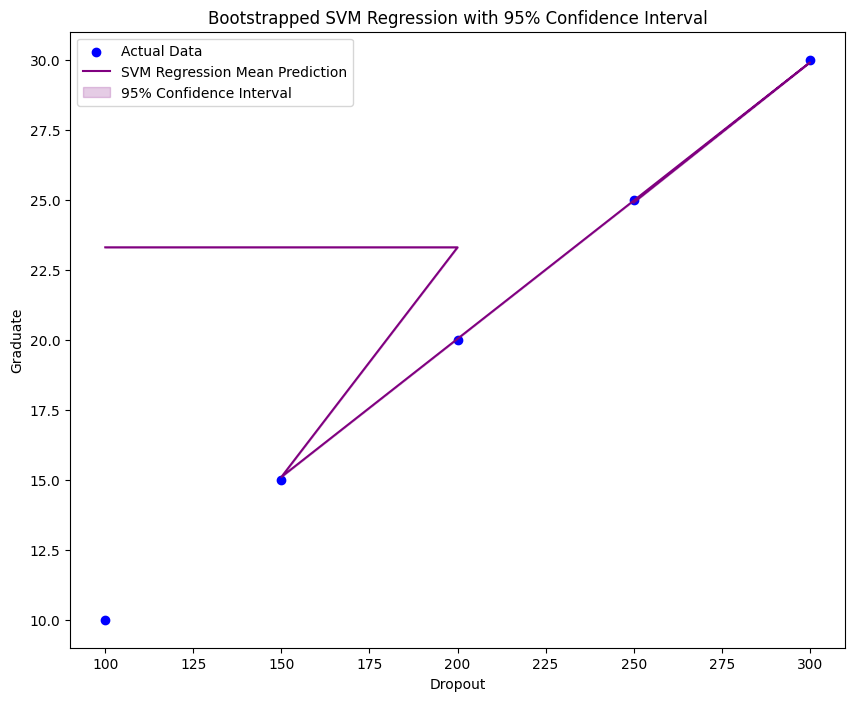

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.utils import resample
data = pd.DataFrame({'Dropout': [100, 200, 150, 300, 250], 'Graduate': [10, 20, 15,30, 25]})
x = data[['Dropout']].to_numpy()
y = data['Graduate'].to_numpy()
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(x, y)
n_bootstraps = 1000
predictions = []
for _ in range(n_bootstraps):
  x_resampled, y_resampled = resample(x, y)
svr.fit(x_resampled, y_resampled)
y_pred = svr.predict(x)
predictions.append(y_pred)
predictions = np.array(predictions)
y_pred_mean = predictions.mean(axis=0)
y_pred_lower = np.percentile(predictions, 2.5, axis=0)
y_pred_upper = np.percentile(predictions, 97.5, axis=0)
plt.figure(figsize=(10, 8))
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_pred_mean, color='purple', label='SVM Regression Mean Prediction')
plt.fill_between(x.flatten(), y_pred_lower, y_pred_upper, color='purple',alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Dropout')
plt.ylabel('Graduate')
plt.title('Bootstrapped SVM Regression with 95% Confidence Interval')
plt.legend()
plt.show()